# Steve Groves: Capstone Project

## Notebook 2: What Areas Should the Agency Focus On?


### Step 1: Read the Service Request Data in to a Pandas Dataframe

In [1]:
# Import pandas library
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Get the start time of the data load process
load_start = datetime.now()
print("Data Load - start Time: ", load_start)

# Specify file directory properties
Path = "C:\\Users\STEPHENGroves\\Box Sync\\SteveG - Laptop Sync\\Work Stuff\\Training\\PyR\\Capstone Project\\Data\\"
# Filename = "311_Service_Requests_from_2010_to_Present - HDP Only_1000.csv"    # Sample test file for notebook creation
Filename = "311_Service_Requests_from_2010_to_Present - HDP Only.csv"

Infile = open(Path + Filename)

# Read the csv file to a pandas dataframe and parse the two date fields so that they are typed as dates and not string
cap_df = pd.read_csv(Infile,parse_dates=['Created Date','Closed Date'])

# Get the finish time of the data load process
load_end = datetime.now()
print("Data Load - Finish Time: ", load_end)
print("Data load time is:", load_end - load_start)

# Close the referenced file and view the first two records of the dataframe
Infile.close()
cap_df.head(2)



Data Load - start Time:  2019-11-19 18:48:05.176010
Data Load - Finish Time:  2019-11-19 18:51:51.385454
Data load time is: 0:03:46.209444


,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,15716674,2010-01-12,2010-02-08,PLUMBING,RADIATOR,RESIDENTIAL BUILDING,11230.0,1001 AVENUE H,AVENUE H,ADDRESS,BROOKLYN,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.629459,-73.966928
1,15716675,2010-01-12,2010-01-15,HEATING,HEAT,RESIDENTIAL BUILDING,10456.0,1400 MORRIS AVENUE,MORRIS AVENUE,ADDRESS,BRONX,Closed,More than one complaint was received for this ...,Unspecified,40.838031,-73.911282


### Step 2: Select the Required Data

Question 2 is asking: <br>
<b>"Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?" </b><br><br>
Question 1 found that the most common complaint type was "Heat/Hot Water", therefore we will select just the complaints of this type as primary dataframe for the analysis of Question 2

#### Step 2.1: Selecting the required data from the original Service Request data set

In [2]:
# hhw_df contains just the heating/hotwater complaints
# As the questions asks about zip codes, boroughs and streets, we will select a subset of columns, as not all are needed
hhw_df = cap_df.loc[cap_df['Complaint Type'].isin(['HEAT/HOT WATER']),['Unique Key','Created Date','Closed Date','Complaint Type','Incident Zip','Street Name','Borough','Latitude','Longitude']]   
hhw_df.head(3)

,Unique Key,Created Date,Closed Date,Complaint Type,Incident Zip,Street Name,Borough,Latitude,Longitude
2594842,27611774,2014-03-11,2014-03-13,HEAT/HOT WATER,11216.0,NOSTRAND AVENUE,BROOKLYN,40.678626,-73.949663
2594843,27611775,2014-03-11,2014-03-14,HEAT/HOT WATER,11432.0,169 STREET,QUEENS,40.710473,-73.792888
2594844,27611776,2014-03-11,2014-03-13,HEAT/HOT WATER,10031.0,WEST 145 STREET,MANHATTAN,40.825595,-73.948489


<font color=blue>
High level location data has been kept in the hhw_df as analysis is either at the street, zip or borough level.<br>
Lat & Long information has been kept in case we want to map any of the data or results later in the notebook<br>
As mentioned previously, only complaints relating to Heating / Hot Water have been kept for analysis
</font>



#### Step 2.2: Checking for Missing Values across all fields but pay special attention to the key location fields Zip, Borough & Street

In [3]:
#Identify missing values
missing_hhw = hhw_df.isnull()
missing_hhw.head(3)

,Unique Key,Created Date,Closed Date,Complaint Type,Incident Zip,Street Name,Borough,Latitude,Longitude
2594842,False,False,False,False,False,False,False,False,False
2594843,False,False,False,False,False,False,False,False,False
2594844,False,False,False,False,False,False,False,False,False


In [4]:
# Summarise missing data 
non_keyfields = ['Unique Key','Created Date','Closed Date','Complaint Type','Latitude','Longitude']
keyfields = ['Incident Zip', 'Street Name', 'Borough']

print('-------------------------------------------------------------')
print('-- Missing Value Analysis: Identifying Fields and Metadata --')
print('-------------------------------------------------------------')
for field in non_keyfields:
    print(field)
    print (missing_hhw[field].value_counts())
    print("") 

print('-------------------------------------------------')
print('-- Missing Value Analysis: Key Analysis Fields --')
print('-------------------------------------------------')
for field in keyfields:
    print(field)
    print (missing_hhw[field].value_counts())
    print("") 

-------------------------------------------------------------
-- Missing Value Analysis: Identifying Fields and Metadata --
-------------------------------------------------------------
Unique Key
False    1182468
Name: Unique Key, dtype: int64

Created Date
False    1182468
Name: Created Date, dtype: int64

Closed Date
False    1175823
True        6645
Name: Closed Date, dtype: int64

Complaint Type
False    1182468
Name: Complaint Type, dtype: int64

Latitude
False    1175392
True        7076
Name: Latitude, dtype: int64

Longitude
False    1175392
True        7076
Name: Longitude, dtype: int64

-------------------------------------------------
-- Missing Value Analysis: Key Analysis Fields --
-------------------------------------------------
Incident Zip
False    1175391
True        7077
Name: Incident Zip, dtype: int64

Street Name
False    1182468
Name: Street Name, dtype: int64

Borough
False    1182468
Name: Borough, dtype: int64



<font color=blue>
The Missing Value Analysis on Identifying Fields shows: <br>
 - Every complaint has a Unique ID, Creation Date and Complaint Type<br>
 - There are missing values in some metadata fields, such as Long & Lat and Close Date<br><br>
The Missing Value Analysis on Key Analysis Fields shows:<br>
 - Complete data is available for both Street Name and Borough<br>
 - There are 7077 missing values of zip code<br>
   - Missing Zip codes will be recoded to "Unknown" after being converted from integer to string values</font>

#### Step 2.3: Clean the missing values in zip code

In [5]:
# Convert 'Incident Zip' from integer to string and replace missing zip with "Unknown"
hhw_df['Incident Zip'] = hhw_df['Incident Zip'].astype(str)
hhw_df["Incident Zip"].replace(np.nan, 'Unknown', inplace=True)

### Step 3: Analysis of Complaints by Borough, Zip and Street

In [6]:
# Check variables types to decide on the most appropriate analysis
hhw_df.dtypes

Unique Key                 int64
Created Date      datetime64[ns]
Closed Date       datetime64[ns]
Complaint Type            object
Incident Zip              object
Street Name               object
Borough                   object
Latitude                 float64
Longitude                float64
dtype: object

In [7]:
hhw_df.describe(include=['object'])

,Complaint Type,Incident Zip,Street Name,Borough
count,1182468,1182468,1182468,1182468
unique,1,191,5245,6
top,HEAT/HOT WATER,11226.0,GRAND CONCOURSE,BRONX
freq,1182468,39299,20702,383259


<font color=blue>
The Street, Zip and Borough with the most Heat/Hot Water complaints are: <br>
 - Street:&emsp;&emsp;&nbsp; Grand Concourse<br>
 - Zip Code:&emsp; 11226<br>
 - Borough:&emsp;&nbsp; Bronx
</font>

#### Step 3.1: Analysis at the Borough Level

In [8]:
# Count number of complaints for each borough
boroughs_df = hhw_df['Borough'].value_counts()
boroughs_df.head(10)

BRONX            383259
BROOKLYN         361878
MANHATTAN        268430
QUEENS           157218
STATEN ISLAND     11682
Unspecified           1
Name: Borough, dtype: int64

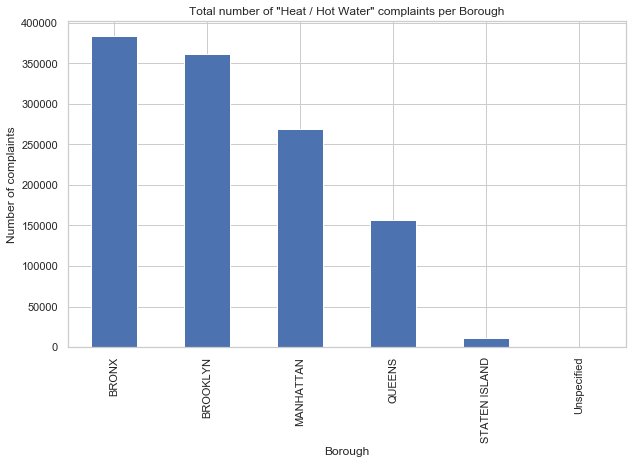

In [9]:
# Plot the above incidents on Bar chart for each borough
boroughs_df.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Borough') # add to x-label to the plot
plt.ylabel('Number of complaints') # add y-label to the plot
plt.title('Total number of "Heat / Hot Water" complaints per Borough') # add title to the plot

plt.show()


<font color=blue>
Whilst the Bronx has the highest total number of Heating / Hot Water complaints (383259), Brooklyn is in a very close second place.<br>    
</font>

#### Step 3.2: Analysis at the Zip Code Level

In [10]:
# Count number of complaints for each zip code
zip_df = hhw_df['Incident Zip'].value_counts()
print('The 7 Zip Codes with the most complaints are:')
print(zip_df.head(7))
print('')
print('The 7 Zip Codes with the least complaints are:')
print(zip_df.tail(7))

The 7 Zip Codes with the most complaints are:
11226.0    39299
10458.0    36472
10467.0    35641
10468.0    32062
10453.0    31990
10452.0    26388
10031.0    25820
Name: Incident Zip, dtype: int64

The 7 Zip Codes with the least complaints are:
10020.0    2
10169.0    2
10121.0    1
10103.0    1
12345.0    1
10045.0    1
10129.0    1
Name: Incident Zip, dtype: int64


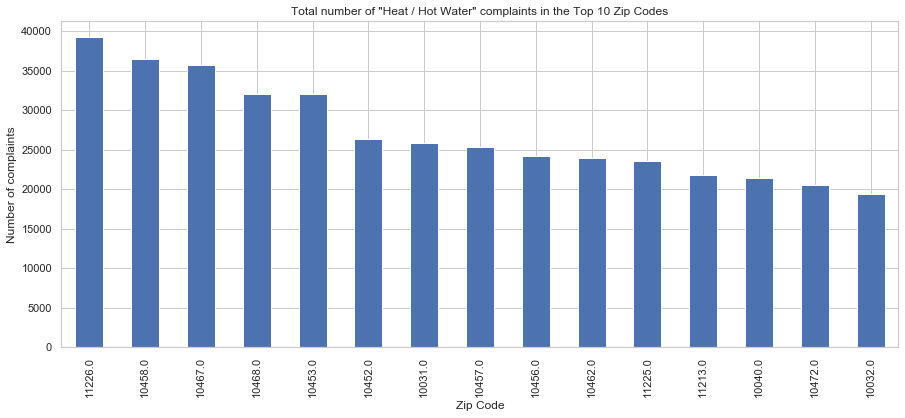

In [11]:
# As there are lots of zip codes, plot just the top 15 on a Bar chart
zip_df.head(15).plot(kind='bar', figsize=(15, 6))

plt.xlabel('Zip Code') # add to x-label to the plot
plt.ylabel('Number of complaints') # add y-label to the plot
plt.title('Total number of "Heat / Hot Water" complaints in the Top 10 Zip Codes') # add title to the plot

plt.show()


<font color=blue>
Whilst there are 5 zip codes with over 30,000 Heating / Hot Water complaints, zip code 11226 has the highest number with 39,299 complaints.<br>    
</font>

#### Step 3.3: Analysis at the Street Level

In [12]:
# Count number of complaints for each street 
street_df = hhw_df['Street Name'].value_counts()
print('The 5 Streets with the most complaints are:')
print(street_df.head(5))
print('')
print('The 5 Streets with the least complaints are:')
print(street_df.tail(7))

The 5 Streets with the most complaints are:
GRAND CONCOURSE    20702
BROADWAY           14743
ELMHURST AVENUE    10372
OCEAN AVENUE        9477
MORRIS AVENUE       9283
Name: Street Name, dtype: int64

The 5 Streets with the least complaints are:
WINTHROP PLACE         1
VANDERVEER PLACE       1
BEACH 58 STREET        1
KNICKERBOCK AVENUE     1
AMITY PLACE            1
HORNADAY PLACE         1
NORTH GANNON AVENUE    1
Name: Street Name, dtype: int64


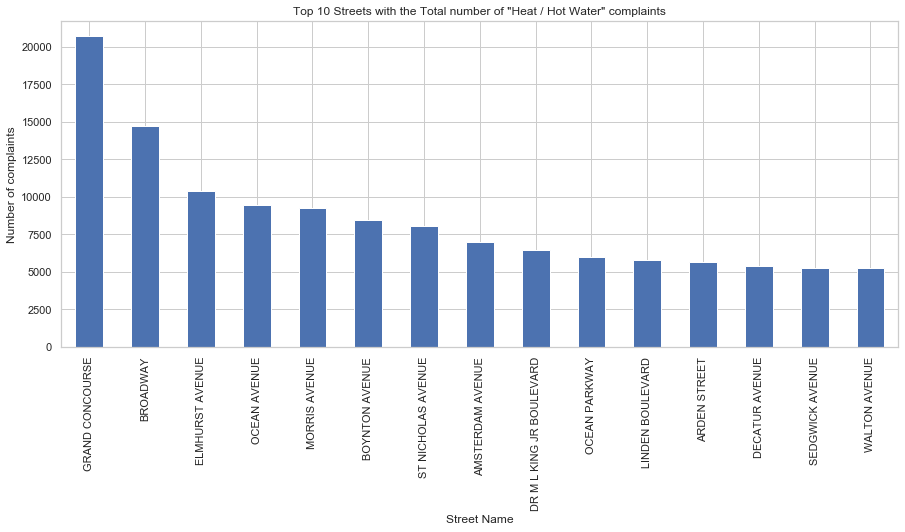

In [13]:
# As there are lots of individual streets, plot just the top 15 on a Bar chart
street_df.head(15).plot(kind='bar', figsize=(15, 6))

plt.xlabel('Street Name') # add to x-label to the plot
plt.ylabel('Number of complaints') # add y-label to the plot
plt.title('Top 10 Streets with the Total number of "Heat / Hot Water" complaints') # add title to the plot

plt.show()


<font color=blue>
Whilst there are 3 Streets codes with over 10,000 Heating / Hot Water complaints, Grand Concourse has the highest number with 20,702 complaints.<br>    
</font>

### Step 4: Mapping the Complaints within New York

#### Step 4.1: Import the Folium mapping library

In [14]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium
from folium import plugins
from folium.plugins import HeatMap


Solving environment: ...working... done

# All requested packages already installed.



In [15]:
# Check that we can get a map of New York - the coordinates listed are for the NY Stock Exchance on Wall Street
lat = 40.707067
long = -74.010888
zoom = 11
base_map = folium.Map(location=[lat, long],zoom_start = zoom) 
#base_map

In [16]:
# Filter the DF for rows, then columns, then remove NaNs

heat_df = hhw_df[(hhw_df['Created Date'] >= '2019-10-01')]         # Select data just from last 2 months (reduce data size)
heat_df = heat_df[['Latitude', 'Longitude']]                       # Select just the Latitude & Longitude fields
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])  # Remove missing values on Lat / Long

# List comprehension to make out list of lists
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]


In [17]:
# Plot the array of coordinates created above on the initial folium base map
HeatMap(heat_data).add_to(base_map)

# Display the map
base_map


<font color=blue>
The above charts displays areas with higher density of complaints.  <br>
Red areas receive higher number of complaints, followed by yellow and then green.  <br>
Blue areas receive lowest number of complaints.
</font>

In [18]:
# Zoom in on the Time Square Area and look at complaint density
lat = 40.758177
long = -73.985535
zoom = 16
base_map = folium.Map(location=[lat, long],zoom_start = zoom) 
HeatMap(heat_data).add_to(base_map)
base_map

## Conclusion:

<font color=blue>
In order to answer the question around what areas the agency should focus on in relation to specific Boroughs, Zip Codes or Streets, <b>after cleansing the data</b>, we have found the following information:<br>
&emsp;1) The Bronx has the highest total number of Heating / Hot Water complaints (383259), Brooklyn is in a very close second place.<br>
&emsp;2) Whilst there are 5 zip codes with over 30,000 Heating / Hot Water complaints, zip code 11226 has the highest number with 39,299 complaints.<br>
&emsp;3) There are 3 Streets with over 10,000 Heating / Hot Water complaints each, but Grand Concourse has the highest number with 20,702 complaints.<br><br>
Finally, we have demonstrated that it is possible to visualise the complaint density on a heat map which clealy shows where the most and least complaints occur.   
</font>
